In [347]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [348]:
import yfinance as yf

In [349]:
ticker_symbol = 'AAPL'
start_date = '2022-11-01'
end_date = '2024-11-02'

apple_data = yf.download(ticker_symbol, start=start_date, end=end_date)
apple_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2022-11-01,148.835,150.650,155.450,149.130,155.080,80379300
2022-11-02,143.283,145.030,152.170,145.000,148.950,93604600
2022-11-03,137.207,138.880,142.800,138.750,142.060,97918500
2022-11-04,136.940,138.380,142.670,134.380,142.090,140814800
2022-11-07,137.474,138.920,139.150,135.670,137.110,83374600


In [350]:
apple_data.columns

MultiIndex([('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [351]:
if isinstance(apple_data.columns, pd.MultiIndex):
    apple_data.columns = [col[0] for col in apple_data.columns]

apple_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2022-11-01,148.835,150.650,155.450,149.130,155.080,80379300
2022-11-02,143.283,145.030,152.170,145.000,148.950,93604600
2022-11-03,137.207,138.880,142.800,138.750,142.060,97918500
2022-11-04,136.940,138.380,142.670,134.380,142.090,140814800
2022-11-07,137.474,138.920,139.150,135.670,137.110,83374600


In [352]:
apple_data.to_csv("apple_data.csv")

In [353]:
df = pd.read_csv("/content/apple_data.csv")
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2022-11-01,148.835,150.650,155.450,149.130,155.080,80379300
1,2022-11-02,143.283,145.030,152.170,145.000,148.950,93604600
2,2022-11-03,137.207,138.880,142.800,138.750,142.060,97918500
3,2022-11-04,136.940,138.380,142.670,134.380,142.090,140814800
4,2022-11-07,137.474,138.920,139.150,135.670,137.110,83374600


In [354]:
df.tail()

,Date,Adj Close,Close,High,Low,Open,Volume
499,2024-10-28,233.143,233.400,234.730,232.550,233.320,36087100
500,2024-10-29,233.413,233.670,234.330,232.320,233.100,35417200
501,2024-10-30,229.847,230.100,233.470,229.550,232.610,47070900
502,2024-10-31,225.662,225.910,229.830,225.370,229.340,64370100
503,2024-11-01,222.665,222.910,225.350,220.270,220.970,65276700


In [355]:
df.duplicated().sum()

0

In [356]:
df.shape

(504, 7)

In [357]:
df.isnull().sum()

,0
Date,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Adj Close  504 non-null    float64
 2   Close      504 non-null    float64
 3   High       504 non-null    float64
 4   Low        504 non-null    float64
 5   Open       504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


In [359]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2022-11-01,150.650
1,2022-11-02,145.030
2,2022-11-03,138.880
3,2022-11-04,138.380
4,2022-11-07,138.920


In [360]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    504 non-null    datetime64[ns]
 1   Close   504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


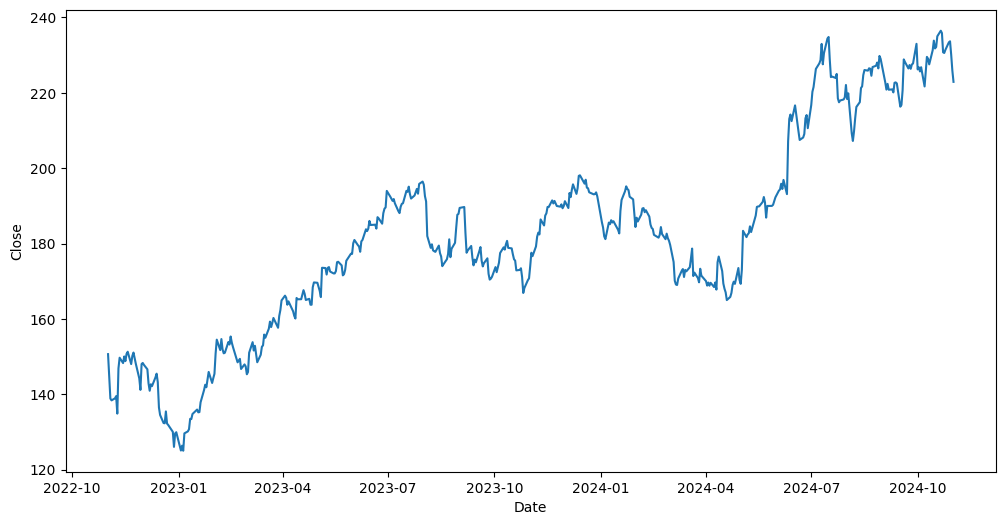

In [361]:
plt.figure(figsize = (12, 6))
sns.lineplot(x = 'Date', y = 'Close', data = df)
plt.show()

In [362]:
df.set_index('Date', inplace=True)
df.head()

,Close
Date,
2022-11-01,150.650
2022-11-02,145.030
2022-11-03,138.880
2022-11-04,138.380
2022-11-07,138.920


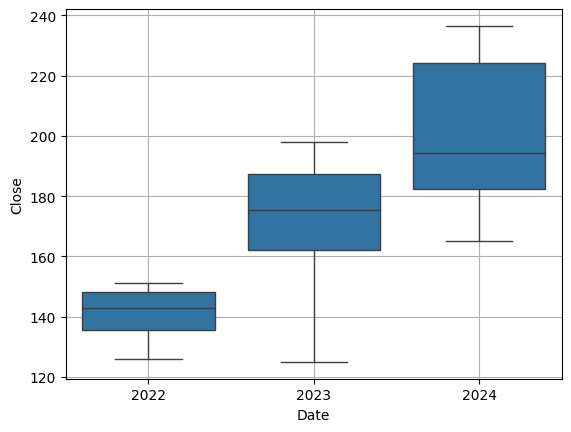

In [363]:
sns.boxplot(x=df.index.year, y = df['Close'])
plt.grid()
plt.show()

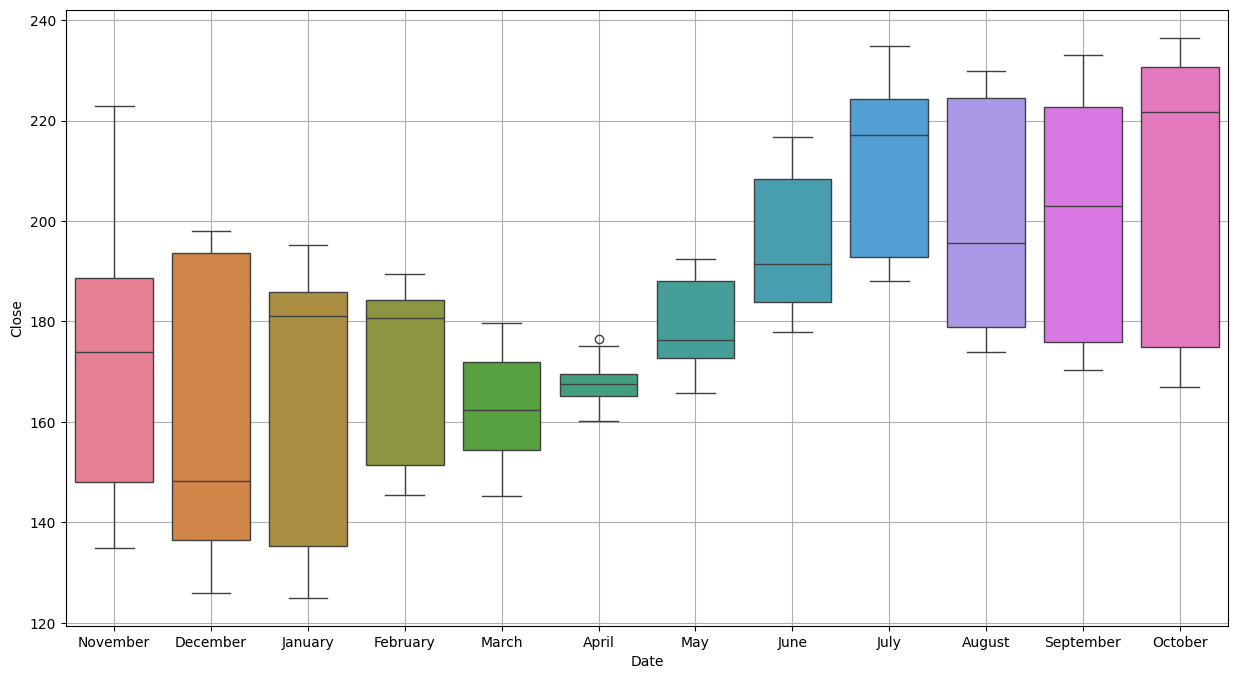

In [364]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df.index.month_name(), y = df['Close'], hue = df.index.month_name())
plt.grid()
plt.show()

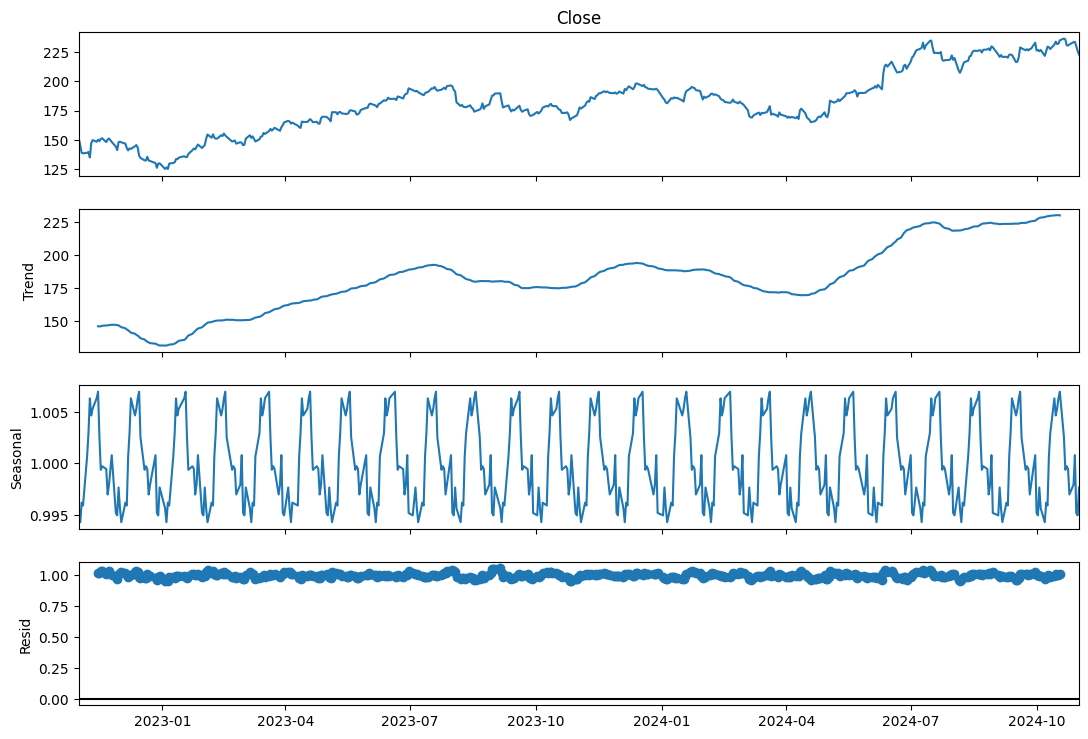

In [365]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=21)

fig = decomposition.plot()

fig.set_size_inches(12, 8)

plt.show()



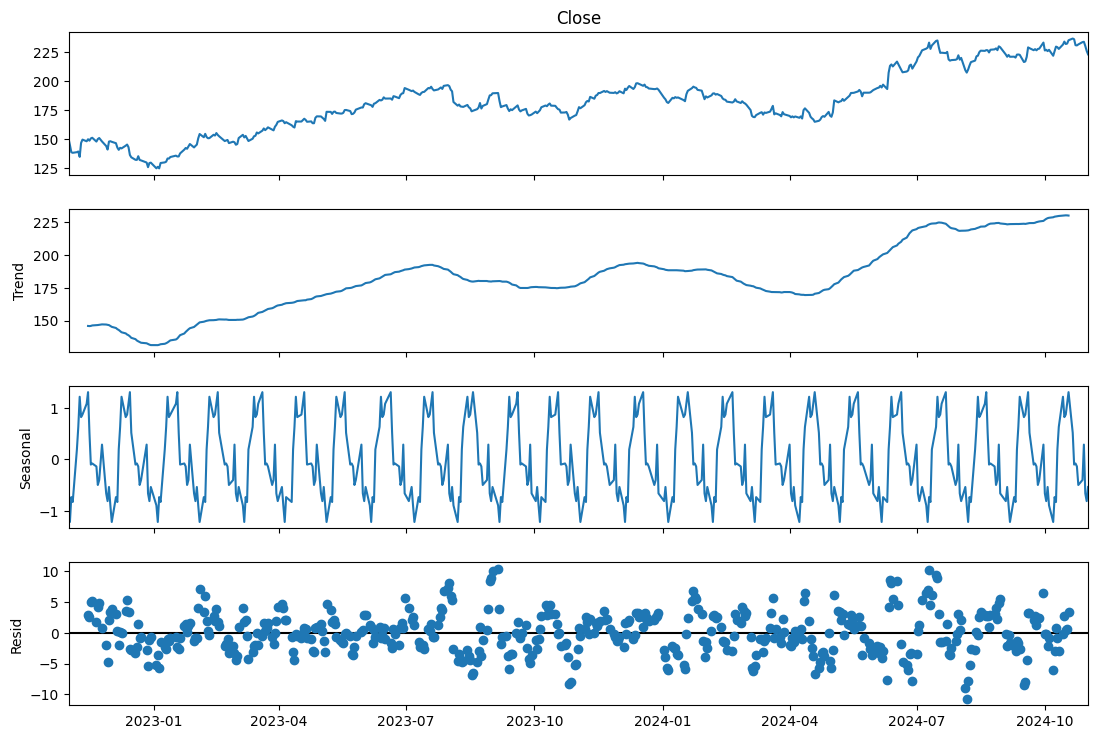

In [366]:
decomposition = seasonal_decompose(df['Close'], model='additive', period=21)

fig = decomposition.plot()

fig.set_size_inches(12, 8)

plt.show()


In [367]:
len(df)

504

In [368]:
df.index.min()

Timestamp('2022-11-01 00:00:00')

In [369]:
df.index.max()

Timestamp('2024-11-01 00:00:00')

In [370]:
start_date = "2022-11-01"
end_date = "2024-11-01"

In [371]:
from pandas.tseries.holiday import USFederalHolidayCalendar

start_date = df.index.min()
end_date = df.index.max()

all_business_days = pd.date_range(start=start_date, end=end_date, freq='B')

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=start_date, end=end_date)

valid_trading_days = all_business_days.difference(holidays)

print(f"Total business days (excluding weekends): {len(all_business_days)}")
print(f"Valid trading days after removing holidays: {len(valid_trading_days)}")

if df.shape[0] == len(valid_trading_days):
    print("The number of trading days in both datasets match!")
else:
    print("The number of trading days in both datasets do not match!")


Total business days (excluding weekends): 524
Valid trading days after removing holidays: 502
The number of trading days in both datasets do not match!


In [372]:
from statsmodels.tsa.stattools import adfuller


def fullers_test(time_series):
  result = adfuller(time_series)
  print('ADF Statistic:', result[0])
  print('p-value:', result[1])

  if result[1] <= 0.05:
     print('The time series is stationary.')
  else:
     print('The time series is non-stationary.')

fullers_test(df['Close'])

ADF Statistic: -1.12311566141966
p-value: 0.7057661747054811
The time series is non-stationary.


In [373]:
df['1st_Diff'] = df['Close'] - df['Close'].shift(1)
df.head()

,Close,1st_Diff
Date,,
2022-11-01,150.650,NaN
2022-11-02,145.030,-5.620
2022-11-03,138.880,-6.150
2022-11-04,138.380,-0.500
2022-11-07,138.920,0.540


In [374]:
fullers_test(df['1st_Diff'].dropna())

ADF Statistic: -21.024996686069127
p-value: 0.0
The time series is stationary.


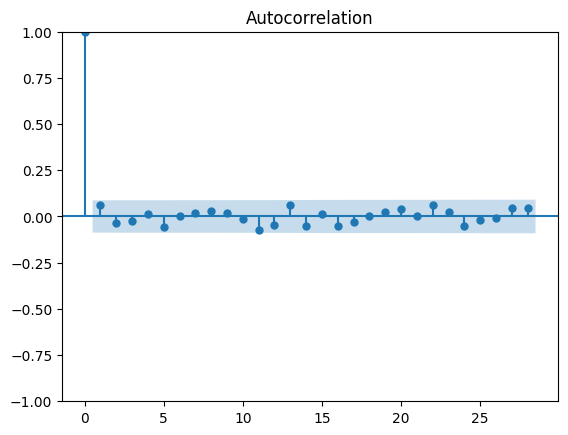

In [375]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['1st_Diff'].dropna())
plt.show()

In [376]:
from statsmodels.tsa.stattools import acf, pacf

acf_values = pd.Series(acf(df['1st_Diff'].dropna(), nlags=20))
acf_values

,0
0,1.000
1,0.065
2,-0.038
3,-0.023
4,0.012
5,-0.056
6,0.000
7,0.021
8,0.030
9,0.018


In [377]:
pacf_values = pd.Series(pacf(df['1st_Diff'].dropna(), nlags=20))
pacf_values

,0
0,1.000
1,0.065
2,-0.042
3,-0.017
4,0.013
5,-0.061
6,0.009
7,0.017
8,0.025
9,0.018


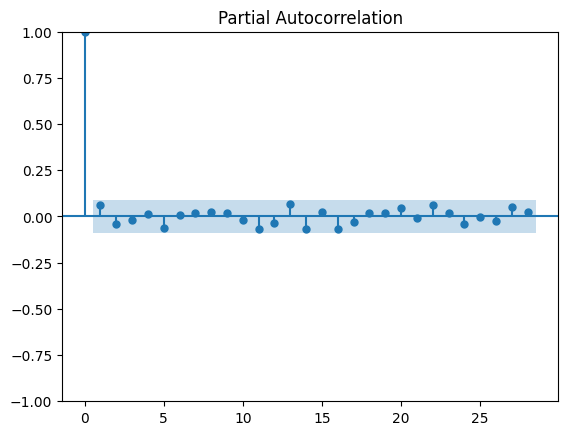

In [378]:
plot_pacf(df['1st_Diff'].dropna())
plt.show()

In [379]:
df.head(31)

,Close,1st_Diff
Date,,
2022-11-01,150.650,NaN
2022-11-02,145.030,-5.620
2022-11-03,138.880,-6.150
2022-11-04,138.380,-0.500
2022-11-07,138.920,0.540
2022-11-08,139.500,0.580
2022-11-09,134.870,-4.630
2022-11-10,146.870,12.000
2022-11-11,149.700,2.830


In [380]:
df['seasonal_differencing'] = df['Close'] - df['Close'].shift(21)
df.head()

,Close,1st_Diff,seasonal_differencing
Date,,,
2022-11-01,150.650,NaN,NaN
2022-11-02,145.030,-5.620,NaN
2022-11-03,138.880,-6.150,NaN
2022-11-04,138.380,-0.500,NaN
2022-11-07,138.920,0.540,NaN


In [381]:
fullers_test(df['seasonal_differencing'].dropna())

ADF Statistic: -3.5451077497324035
p-value: 0.006901445285587517
The time series is stationary.


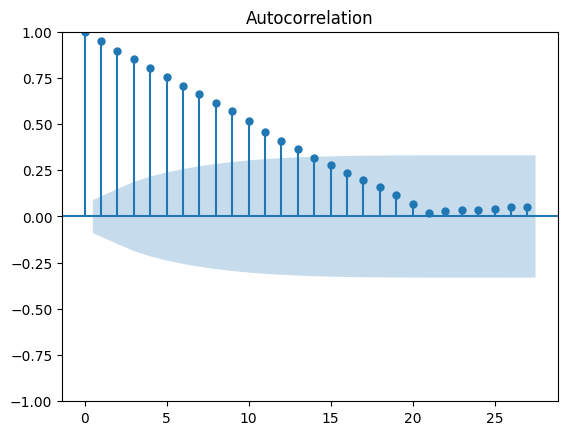

In [382]:
plot_acf(df['seasonal_differencing'].dropna())
plt.show()

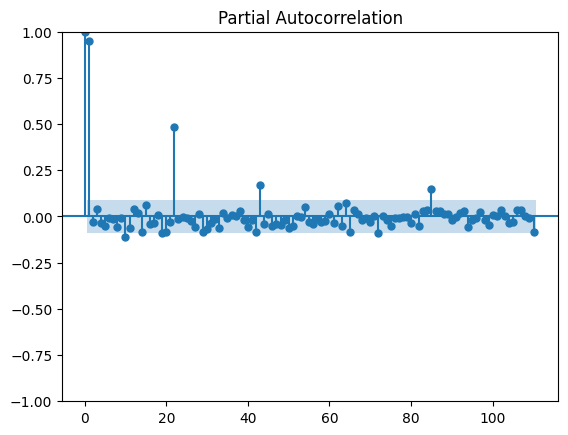

In [383]:
plot_pacf(df['seasonal_differencing'].dropna(), lags=110)
plt.show()

In [384]:
import pmdarima as pm

auto_arima = pm.auto_arima(df['Close'], seasonal=True, m=21, trace=True, suppress_warnings=True)
print(auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[21] intercept   : AIC=2420.724, Time=6.32 sec
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=2414.393, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=2416.250, Time=0.66 sec
 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=2416.077, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=2413.862, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[21] intercept   : AIC=2416.391, Time=0.32 sec
 ARIMA(0,1,0)(0,0,1)[21] intercept   : AIC=2416.391, Time=0.38 sec
 ARIMA(0,1,0)(1,0,1)[21] intercept   : AIC=2418.393, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[21] intercept   : AIC=2414.264, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[21] intercept   : AIC=2414.089, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[21] intercept   : AIC=2415.809, Time=0.31 sec

Best model:  ARIMA(0,1,0)(0,0,0)[21]          
Total fit time: 9.613 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:      

In [385]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df['Close'], order=(0, 1, 0))
arima_results = arima_model.fit()
print(arima_results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  504
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1205.931
Date:                Wed, 08 Jan 2025   AIC                           2413.862
Time:                        08:48:58   BIC                           2418.082
Sample:                             0   HQIC                          2415.517
                                - 504                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         7.0786      0.279     25.329      0.000       6.531       7.626
Ljung-Box (L1) (Q):                   2.12   Jarque-Bera (JB):               201.88
Prob(Q):                              0.15   Pr

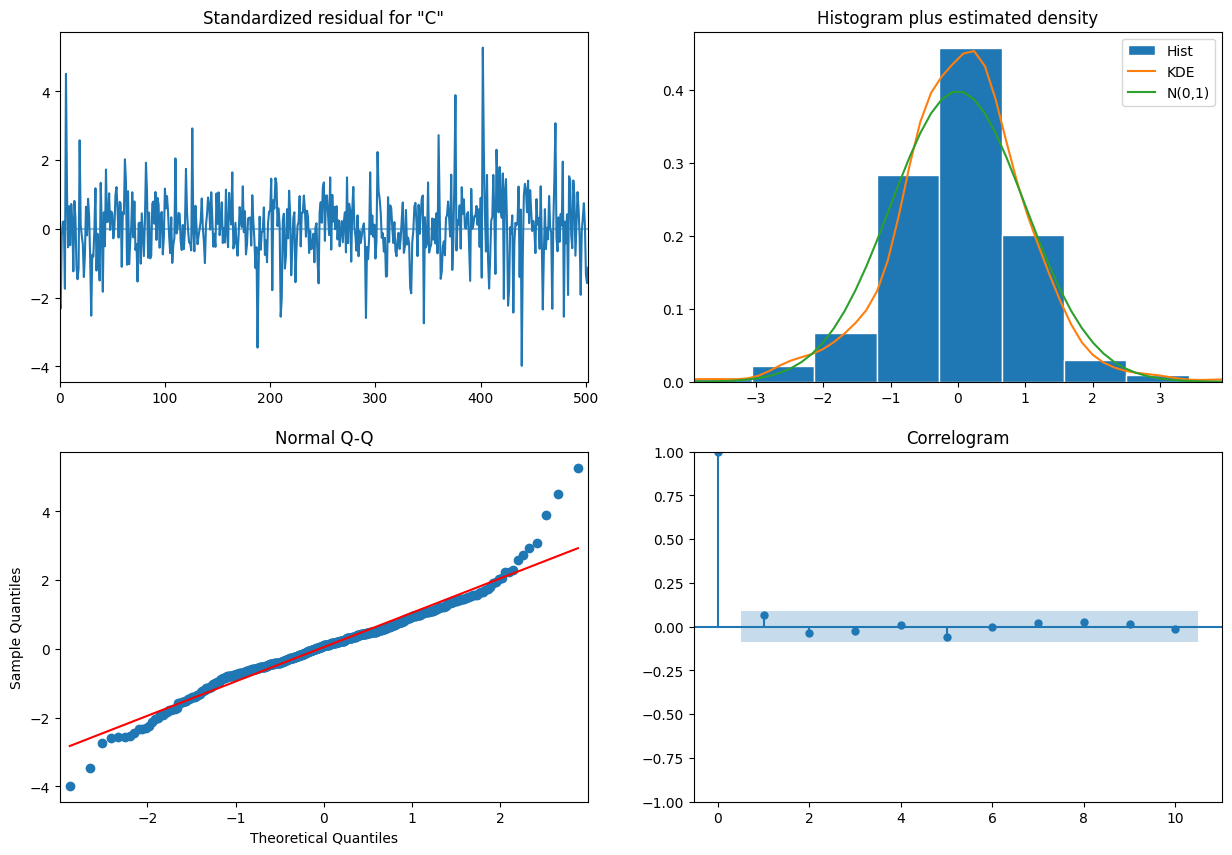

In [386]:
arima_results.plot_diagnostics(figsize=(15, 10))
plt.show()

In [387]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = arima_results.resid
lb_test = acorr_ljungbox(residuals, lags=30)

print(lb_test)

    lb_stat  lb_pvalue
1     0.303      0.582
2     1.178      0.555
3     1.203      0.752
4     1.209      0.877
5     1.224      0.943
6     1.617      0.951
7     4.185      0.758
8     4.375      0.822
9     4.399      0.883
10    4.426      0.926
11    4.591      0.949
12    4.600      0.970
13    4.663      0.982
14    5.049      0.985
15    5.139      0.991
16    5.144      0.995
17    5.393      0.996
18    5.663      0.997
19    5.782      0.998
20    6.796      0.997
21    6.797      0.999
22    6.807      0.999
23    6.817      1.000
24    7.281      1.000
25    7.397      1.000
26    7.427      1.000
27    7.430      1.000
28    7.609      1.000
29    7.633      1.000
30    7.802      1.000


In [388]:
df.tail()

,Close,1st_Diff,seasonal_differencing
Date,,,
2024-10-28,233.400,1.990,5.610
2024-10-29,233.670,0.270,0.670
2024-10-30,230.100,-3.570,3.890
2024-10-31,225.910,-4.190,-0.870
2024-11-01,222.910,-3.000,-2.760


In [389]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

P = D = Q = range(0, 2)
m = 21
seasonal_pdq = list(itertools.product(P, D, Q, [m]))

best_aic = float('inf')
best_pdq = None
best_seasonal_pdq = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            model = SARIMAX(df['Close'], order=param, seasonal_order=seasonal_param,
                            enforce_stationarity=False, enforce_invertibility=False)
            results = model.fit(disp=False)
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = seasonal_param
        except:
            continue

print(f"Best ARIMA Parameters: {best_pdq}")
print(f"Best Seasonal Parameters: {best_seasonal_pdq}")

Best ARIMA Parameters: (0, 1, 2)
Best Seasonal Parameters: (0, 1, 1, 21)


In [390]:
sarima_model = SARIMAX(df['Close'],
                       order=(0, 1, 2),
                       seasonal_order=(0, 1, 1, 21),
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_results = sarima_model.fit()

print(sarima_results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  504
Model:             SARIMAX(0, 1, 2)x(0, 1, [1], 21)   Log Likelihood               -1112.238
Date:                              Wed, 08 Jan 2025   AIC                           2232.476
Time:                                      08:55:04   BIC                           2248.983
Sample:                                           0   HQIC                          2238.977
                                              - 504                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0623      0.044      1.432      0.152      -0.023       0.148
ma.L2         -0.03

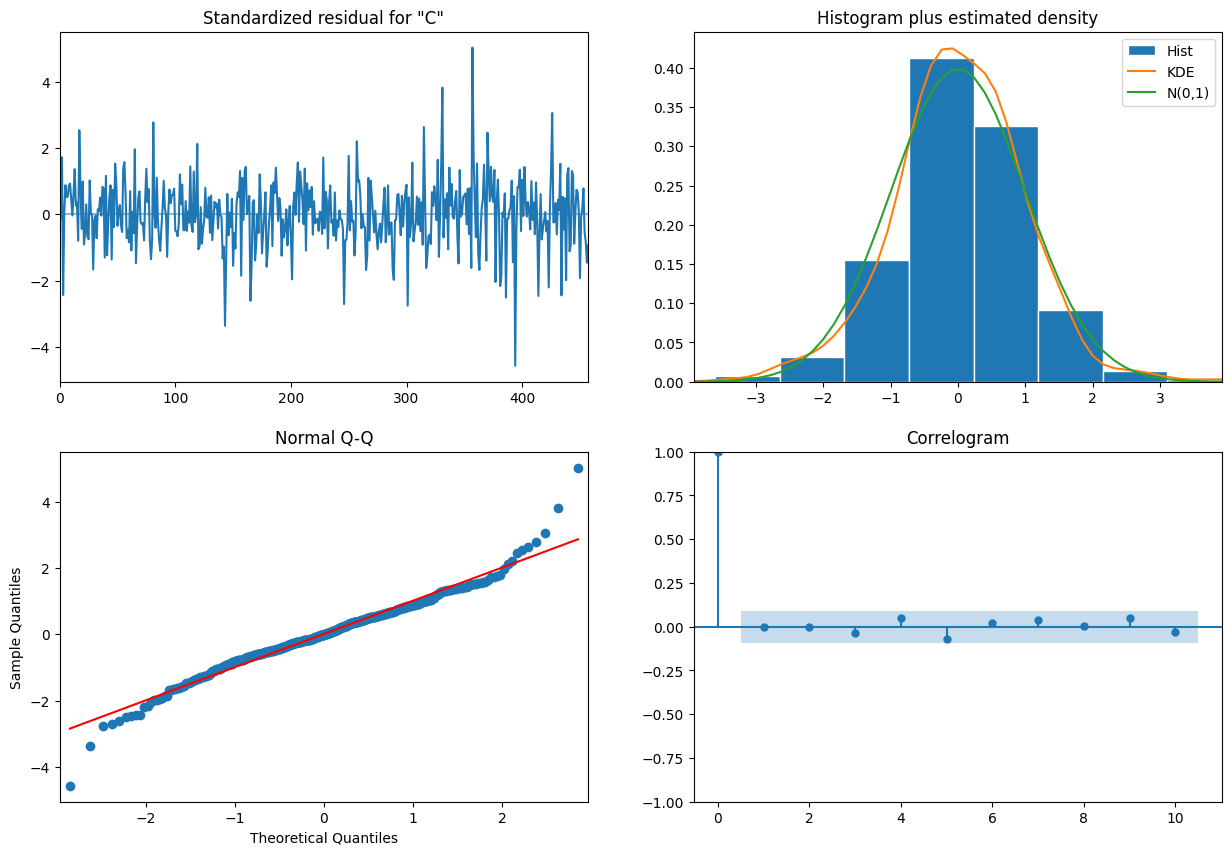

In [391]:
sarima_results.plot_diagnostics(figsize=(15, 10))
plt.show()

In [392]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [393]:
residuals = sarima_results.resid
lb_test = acorr_ljungbox(residuals, lags=30)

print(lb_test)

    lb_stat  lb_pvalue
1     1.634      0.201
2     2.165      0.339
3     2.347      0.504
4     2.471      0.650
5     2.485      0.779
6     3.237      0.779
7     6.993      0.430
8     7.162      0.519
9     7.199      0.616
10    7.720      0.656
11    7.879      0.724
12    8.051      0.781
13    8.082      0.838
14   10.628      0.715
15   11.485      0.718
16   11.486      0.779
17   11.707      0.818
18   11.777      0.859
19   11.862      0.891
20   14.131      0.824
21  100.653      0.000
22  100.859      0.000
23  101.159      0.000
24  101.875      0.000
25  101.949      0.000
26  101.964      0.000
27  101.983      0.000
28  102.082      0.000
29  102.087      0.000
30  102.215      0.000


In [394]:
df.head()

,Close,1st_Diff,seasonal_differencing
Date,,,
2022-11-01,150.650,NaN,NaN
2022-11-02,145.030,-5.620,NaN
2022-11-03,138.880,-6.150,NaN
2022-11-04,138.380,-0.500,NaN
2022-11-07,138.920,0.540,NaN


In [395]:
df.tail()

,Close,1st_Diff,seasonal_differencing
Date,,,
2024-10-28,233.400,1.990,5.610
2024-10-29,233.670,0.270,0.670
2024-10-30,230.100,-3.570,3.890
2024-10-31,225.910,-4.190,-0.870
2024-11-01,222.910,-3.000,-2.760


In [396]:
df.index[-1]

Timestamp('2024-11-01 00:00:00')

In [397]:
# forecast for next 30 days
forecast_steps = 30
forecast = sarima_results.get_forecast(steps=forecast_steps)

forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')

forecast_df = pd.DataFrame({
    'Forecast': forecast_mean.values,
    'Lower Bound': confidence_intervals.iloc[:, 0].values,
    'Upper Bound': confidence_intervals.iloc[:, 1].values
}, index=forecast_index)

forecast_df


,Forecast,Lower Bound,Upper Bound
2024-11-04,222.988,217.720,228.256
2024-11-05,222.553,214.867,230.239
2024-11-06,224.128,214.732,233.524
2024-11-07,224.246,213.407,235.085
2024-11-08,226.284,214.173,238.396
2024-11-11,227.256,213.994,240.518
2024-11-12,227.950,213.629,242.270
2024-11-13,227.382,212.076,242.689
2024-11-14,227.342,211.110,243.574
2024-11-15,227.841,210.732,244.949


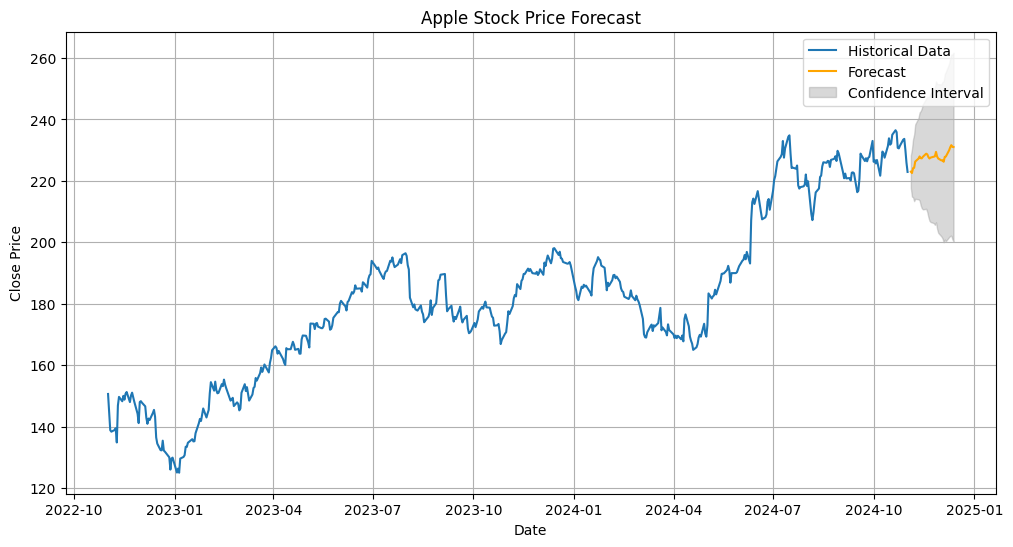

In [398]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical Data')
plt.plot(forecast_df['Forecast'], label='Forecast', color='orange')
plt.fill_between(forecast_df.index, forecast_df['Lower Bound'], forecast_df['Upper Bound'],
                 color='gray', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title('Apple Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [415]:
df = pd.read_csv('/content/apple_data.csv')
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2022-11-01,148.835,150.650,155.450,149.130,155.080,80379300
1,2022-11-02,143.283,145.030,152.170,145.000,148.950,93604600
2,2022-11-03,137.207,138.880,142.800,138.750,142.060,97918500
3,2022-11-04,136.940,138.380,142.670,134.380,142.090,140814800
4,2022-11-07,137.474,138.920,139.150,135.670,137.110,83374600


In [416]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2022-11-01,150.650
1,2022-11-02,145.030
2,2022-11-03,138.880
3,2022-11-04,138.380
4,2022-11-07,138.920


In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    504 non-null    object 
 1   Close   504 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB


In [418]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    504 non-null    datetime64[ns]
 1   Close   504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


In [419]:
prophet_data = df.rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_data.head()

,ds,y
0,2022-11-01,150.650
1,2022-11-02,145.030
2,2022-11-03,138.880
3,2022-11-04,138.380
4,2022-11-07,138.920


In [421]:
import prophet
from prophet import Prophet

prophet_model = Prophet(daily_seasonality=False)
prophet_model.add_seasonality(name='monthly', period=21, fourier_order=5)

prophet_model.fit(prophet_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpf580btnm/qem27zm7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf580btnm/f73o6up0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71906', 'data', 'file=/tmp/tmpf580btnm/qem27zm7.json', 'init=/tmp/tmpf580btnm/f73o6up0.json', 'output', 'file=/tmp/tmpf580btnm/prophet_modelwo1u0hty/prophet_model-20250108092642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [422]:
future_data = prophet_model.make_future_dataframe(periods=30, freq='B')
future_data.tail()

,ds
529,2024-12-09
530,2024-12-10
531,2024-12-11
532,2024-12-12
533,2024-12-13


In [423]:
forecast = prophet_model.predict(future_data)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,151.179,135.006,143.920,151.179,151.179,-11.658,-11.658,-11.658,0.900,...,0.224,0.224,0.224,-12.781,-12.781,-12.781,0.000,0.000,0.000,139.521
1,2022-11-02,150.949,135.094,143.439,150.949,150.949,-11.349,-11.349,-11.349,0.935,...,-0.116,-0.116,-0.116,-12.167,-12.167,-12.167,0.000,0.000,0.000,139.600
2,2022-11-03,150.719,135.283,144.224,150.719,150.719,-11.039,-11.039,-11.039,0.401,...,0.047,0.047,0.047,-11.487,-11.487,-11.487,0.000,0.000,0.000,139.680
3,2022-11-04,150.489,136.828,145.470,150.489,150.489,-9.666,-9.666,-9.666,0.528,...,0.556,0.556,0.556,-10.750,-10.750,-10.750,0.000,0.000,0.000,140.823
4,2022-11-07,149.799,137.467,146.477,149.799,149.799,-7.821,-7.821,-7.821,0.186,...,0.308,0.308,0.308,-8.316,-8.316,-8.316,0.000,0.000,0.000,141.977


In [424]:
forecast[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].tail()

,ds,yhat_lower,yhat_upper,yhat
529,2024-12-09,257.780,267.560,262.776
530,2024-12-10,257.080,267.760,262.687
531,2024-12-11,256.928,267.445,262.251
532,2024-12-12,256.679,267.389,262.578
533,2024-12-13,257.830,268.448,263.058


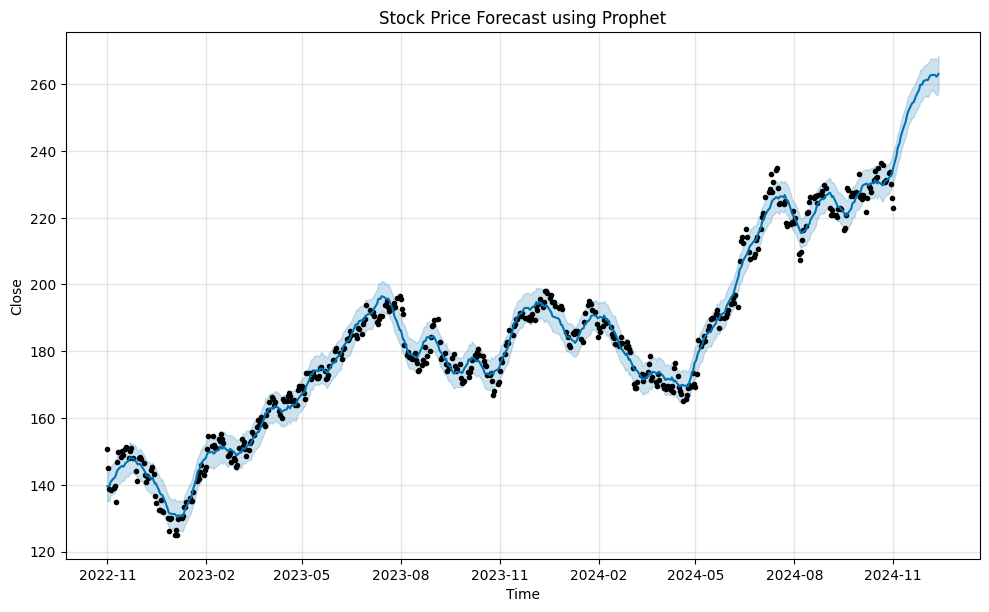

In [426]:
prophet_model.plot(forecast)
plt.title('Stock Price Forecast using Prophet')
plt.xlabel('Time')
plt.ylabel('Close')
plt.show()

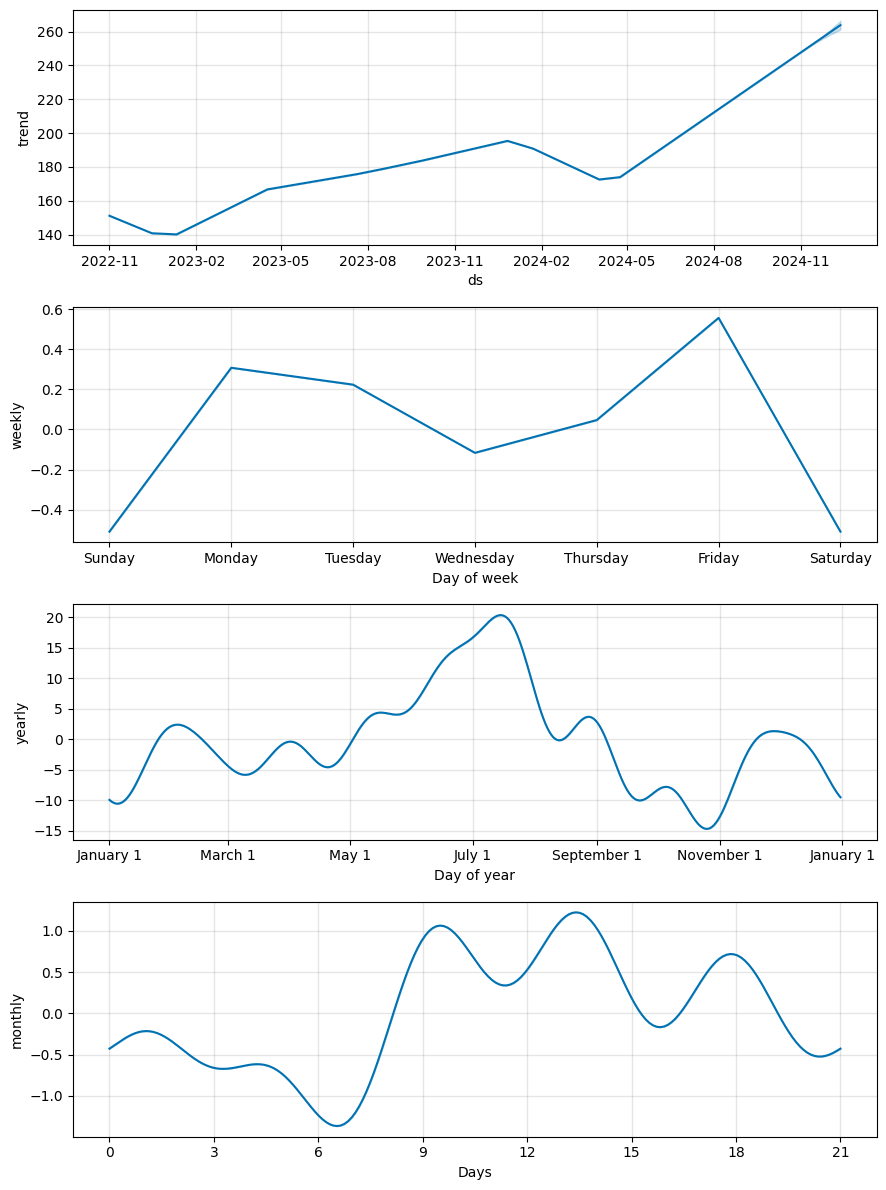

In [427]:
prophet_model.plot_components(forecast)
plt.show()


In [428]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

merged_data = forecast.merge(prophet_data[['ds', 'y']], on='ds', how='left')

merged_data = merged_data.dropna(subset=['y'])

mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
mape = mean_absolute_percentage_error(merged_data['y'], merged_data['yhat'])

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")

Mean Absolute Error (MAE): 2.7704400470785253
Mean Absolute Percentage Error (MAPE): 0.015289066842287388


In [429]:
forecast[['ds', 'yhat']].tail(35)

,ds,yhat
499,2024-10-28,231.917
500,2024-10-29,232.346
501,2024-10-30,232.549
502,2024-10-31,233.632
503,2024-11-01,234.981
504,2024-11-04,238.550
505,2024-11-05,240.758
506,2024-11-06,241.667
507,2024-11-07,242.526
508,2024-11-08,244.395
